In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
pd.options.display.max_colwidth=1000

In [2]:
df=pd.read_csv("Narendra Modi_data.csv")
df.head()

,Date,User,Tweet,Time
0,2022:10:19,QuestionsBotYT,Is Narendra Modi a toaster?,23:57:08
1,2022:10:19,PaperDabba,"5G About To Bring Major Change, Will Revolutionise Education Sector: PM Narendra Modi\nhttps://t.co/4ceDZIEpkX",23:56:38
2,2022:10:19,mnjworldcom123,"Prime Minister Shri Narendra Modi along with H.E. Mr. Pravind Kumar Jugnauth, Prime Minister of Mauritius &amp; Dr. Tedros Adhanom Ghebreyesus, Director General of WHO addressed the inaugural day of the Global Ayush Investment &amp; Innovation Summit at… https://t.co/vQ5Ks4k3hY",23:51:02
3,2022:10:19,BravePedestrian,"Bharat Mata has waited 5000 years for a true son like Narendra Modi to take birth. Modi is not just a PM, he is an incarnation of Lord Vishnu. Amit Shah is like Balarama. Ambani &amp; Adani are like Kubera &amp; Hanuman. Nirmala Sitaraman &amp; Smriti Irani are like Riddhi &amp; Siddhi",23:40:58
4,2022:10:19,NaMoPraveenKor,How Narendra Modi’s game-changing Gati Shakti master plan was envisaged\n https://t.co/v8nuhmrW1b\n\nvia NaMo App https://t.co/4vPzfj7amu,23:34:25


In [3]:
df.shape

(70000, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    70000 non-null  object
 1   User    70000 non-null  object
 2   Tweet   70000 non-null  object
 3   Time    70000 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [5]:
df.isnull().sum()

Date     0
User     0
Tweet    0
Time     0
dtype: int64

### we can observe that there is no null values

## Handling Regular Expression 

In [6]:
demo=df["Tweet"].iloc[476]
demo

'PM Narendra Modi vists Helipad Exhibition Hall in Defence Expo 22 in #Gandhinagar https://t.co/BeoNIMhpWX #Gujarat @PMOIndia\n @CMOGuj @narendramodi @rajnathsingh\n @ADevvrat @GovernorofGuj @PatilOffice\n @BJP4Gujarat @DefExpo_India #DefExpo2022 [watch video] https://t.co/DGoANpJxex'

In [7]:
# Function for removing @user name ,http urls ,# like some symbols

def remove_usernames_links(tweet):
    s2 = re.sub('http://\S+|https://\S+', '', tweet)
    s1=re.sub(r"#[a-zA-Z0-9\\n@_\s]+","",s2)
    return s1    

In [8]:
remove_usernames_links(demo)

'PM Narendra Modi vists Helipad Exhibition Hall in Defence Expo 22 in [watch video] '

In [9]:
# Function for removing emoji

def remove_emoji(txt):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', txt)

In [10]:
remove_emoji("GRATE MAN IN THE WORLD 🙏🙏")

'GRATE MAN IN THE WORLD '

In [11]:
stp=stopwords.words('english')
print(stp)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
#Functions for cleaning tweets and for polarity , subjectivity & Segmentation calculation

def TweetCleaning(tweet):
    link_removal=remove_usernames_links(tweet)
    emoji_removal=remove_emoji(link_removal)
    after_stopword_removal=' '.join(word for word in emoji_removal.split()if word not in stp)
    return after_stopword_removal

def calcPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity


def calcSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return 'positive'
    elif tweet == 0 :
        return 'neutral'
    else:
        return 'negative'



In [13]:
# Creating New Columns

df["CleanedTweet"]=df["Tweet"].apply(TweetCleaning)
df['tPolarity']=df['CleanedTweet'].apply(calcPolarity)
df['tSubjectivity']=df['CleanedTweet'].apply(calcSubjectivity)
df['segmentation']=df['tPolarity'].apply(segmentation)

In [14]:
df.head()

,Date,User,Tweet,Time,CleanedTweet,tPolarity,tSubjectivity,segmentation
0,2022:10:19,QuestionsBotYT,Is Narendra Modi a toaster?,23:57:08,Is Narendra Modi toaster?,0.0000,0.00,neutral
1,2022:10:19,PaperDabba,"5G About To Bring Major Change, Will Revolutionise Education Sector: PM Narendra Modi\nhttps://t.co/4ceDZIEpkX",23:56:38,"5G About To Bring Major Change, Will Revolutionise Education Sector: PM Narendra Modi",0.0625,0.50,positive
2,2022:10:19,mnjworldcom123,"Prime Minister Shri Narendra Modi along with H.E. Mr. Pravind Kumar Jugnauth, Prime Minister of Mauritius &amp; Dr. Tedros Adhanom Ghebreyesus, Director General of WHO addressed the inaugural day of the Global Ayush Investment &amp; Innovation Summit at… https://t.co/vQ5Ks4k3hY",23:51:02,"Prime Minister Shri Narendra Modi along H.E. Mr. Pravind Kumar Jugnauth, Prime Minister Mauritius &amp; Dr. Tedros Adhanom Ghebreyesus, Director General WHO addressed inaugural day Global Ayush Investment &amp; Innovation Summit at…",0.0250,0.25,positive
3,2022:10:19,BravePedestrian,"Bharat Mata has waited 5000 years for a true son like Narendra Modi to take birth. Modi is not just a PM, he is an incarnation of Lord Vishnu. Amit Shah is like Balarama. Ambani &amp; Adani are like Kubera &amp; Hanuman. Nirmala Sitaraman &amp; Smriti Irani are like Riddhi &amp; Siddhi",23:40:58,"Bharat Mata waited 5000 years true son like Narendra Modi take birth. Modi PM, incarnation Lord Vishnu. Amit Shah like Balarama. Ambani &amp; Adani like Kubera &amp; Hanuman. Nirmala Sitaraman &amp; Smriti Irani like Riddhi &amp; Siddhi",0.3500,0.65,positive
4,2022:10:19,NaMoPraveenKor,How Narendra Modi’s game-changing Gati Shakti master plan was envisaged\n https://t.co/v8nuhmrW1b\n\nvia NaMo App https://t.co/4vPzfj7amu,23:34:25,How Narendra Modi’s game-changing Gati Shakti master plan envisaged via NaMo App,0.0000,0.00,neutral



# #Analysis & Visualization


In [15]:
#Checking number of +ve ,-ve & neutral tweets
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,4102
neutral,39087
positive,26811


## Word cloud for Mr MODI.

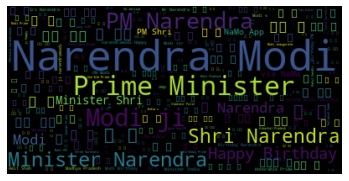

In [16]:
consolidated=' '.join(word for word in df ['CleanedTweet'])
wordCloud=WordCloud(width=400,height=200,random_state=20,max_font_size=119).generate(consolidated)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Scatter plots

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='tPolarity', ylabel='tSubjectivity'>

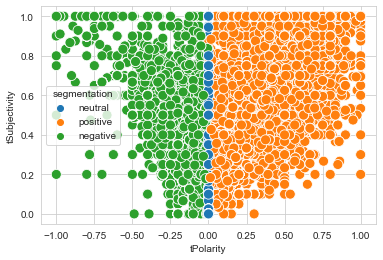

In [18]:
sns.set_style('whitegrid')
sns.scatterplot(data=df,x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<AxesSubplot:xlabel='segmentation', ylabel='count'>

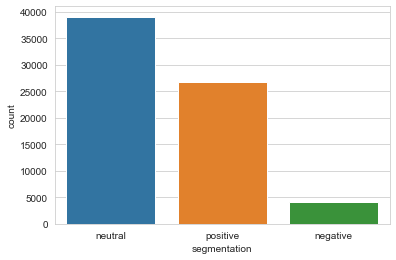

In [19]:
sns.countplot(data=df,x='segmentation')

#### we can observe that Mr modi has got very less number of -ve feedback but he should focus on neutral ones for better performance in coming election .

## ANALYSIS FOR MR . RAHUL GANDHI

In [20]:
df1=pd.read_csv("Rahul Gandhi_data.csv")
df1.head()

,Date,User,Tweet,Time
0,2022:10:19,MdIjran,@JaikyYadav16 इन विकल्पों में से और अभी के समय पर\nRAHUL GANDHI,23:55:49
1,2022:10:19,28bde43dae3c430,"@ndtv Rahul Gandhi left congress in the mid road and now entrusted the dead horse to an old captain with a blunt sword,",23:53:30
2,2022:10:19,SkAnzar5,@JaikyYadav16 Rahul Gandhi,23:32:16
3,2022:10:19,HariRamDamor2,rahul Gandhi ji is real hero of india.,23:32:09
4,2022:10:19,srinivas_das,Rahul Gandhi is getting massive support in Andhra Pradesh. The excitement has gone to next level @RahulGandhi @INCIndia https://t.co/B8NwicUsRO,23:21:18


In [21]:
df1.shape

(70000, 4)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    70000 non-null  object
 1   User    70000 non-null  object
 2   Tweet   70000 non-null  object
 3   Time    70000 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [23]:
df1.isnull().sum()

Date     0
User     0
Tweet    0
Time     0
dtype: int64

## we can clearly notice that there is no null values

## Handling Regular Expression 

In [24]:
demo=df1["Tweet"].iloc[476]
demo

'@mahendra_arya @kharge @ShashiTharoor BTW, Shri Kharge is also the CEO of Young India, meaning he is directly Employed by Sonia Gandhi n Rahul Gandhi, thereby obliged to obey all their orders / commands.\n\n#HighCommand'

In [25]:
# Creating New Columns

df1["CleanedTweet"]=df1["Tweet"].apply(TweetCleaning)
df1['tPolarity']=df1['CleanedTweet'].apply(calcPolarity)
df1['tSubjectivity']=df1['CleanedTweet'].apply(calcSubjectivity)
df1['segmentation']=df1['tPolarity'].apply(segmentation)

In [26]:
df1.tail()

,Date,User,Tweet,Time,CleanedTweet,tPolarity,tSubjectivity,segmentation
69995,2022:09:24,Dilipmakwana181,@BharatJSoni @dranupmodgil Ye chunawala 2 kodi ka Dalal hai usko Rahul Gandhi se jalan hai.,13:39:10,@BharatJSoni @dranupmodgil Ye chunawala 2 kodi ka Dalal hai usko Rahul Gandhi se jalan hai.,0.000000,0.000000,neutral
69996,2022:09:24,RoshanKrRaii,"Even Rahul Gandhi's fiercest critics like myself wouldn't in wildest hate bring about this angle that @MrsGandhi brought, Never knew a woman can be this vile, disgusting and deplorable. All of us should pray for her mental health, she is sick. https://t.co/3n1Nx5vcVs",13:38:21,"Even Rahul Gandhi's fiercest critics like wildest hate bring angle @MrsGandhi brought, Never knew woman vile, disgusting deplorable. All us pray mental health, sick.",-0.642857,0.771429,negative
69997,2022:09:24,NewsShakes,"BHATTACHARJEE SHYAMAL: A "" PSHYCOPATH "" is Rahul Gandhi- Indian Economy I... https://t.co/5Lk5CTjK9b",13:38:07,"BHATTACHARJEE SHYAMAL: A "" PSHYCOPATH "" Rahul Gandhi- Indian Economy I...",0.000000,0.000000,neutral
69998,2022:09:24,ayaz_karbelkar,"@priyankac19 @MinistryWCD She is cooking 'hate pulao'.\nSilly soul , barrel of hypocrisy will not speak as her party's sanskari people are involved.\nShe earns her livelihood by trolling Rahul Gandhi",13:37:59,"@priyankac19 @MinistryWCD She cooking 'hate pulao'. Silly soul , barrel hypocrisy speak party's sanskari people involved. She earns livelihood trolling Rahul Gandhi",-0.650000,0.887500,negative
69999,2022:09:24,PD75058926,@INCIndia Rahul Gandhi video share karo,13:37:42,@INCIndia Rahul Gandhi video share karo,0.000000,0.000000,neutral


In [27]:
#Checking number of +ve ,-ve & neutral tweets
df1.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,7162
neutral,42418
positive,20420


## WORD CLOUD FOR MR. RAHUL GANDHI

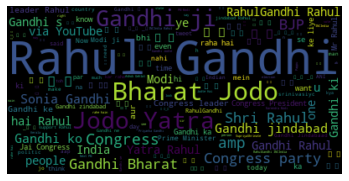

In [28]:
consolidated=' '.join(word for word in df1 ['CleanedTweet'])
wordCloud=WordCloud(width=400,height=200,random_state=20,max_font_size=119).generate(consolidated)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='segmentation', ylabel='count'>

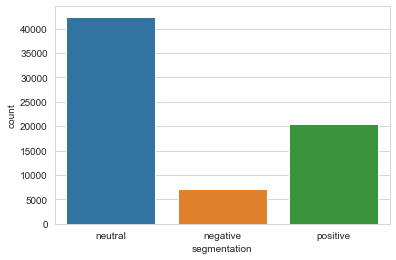

In [38]:
sns.countplot(data=df1,x='segmentation')

## Analysis for Arvind Kejriwal

In [29]:
df2=pd.read_csv("Arvind kejriwal_data.csv")
df2.head()

,Date,User,Tweet,Time
0,2022:10:19,bhoo_sene,@TajinderBagga Aap leaders are speaking against Hindu gods.\nleaders like gopal italia when they open mouth they spew venom against hindus.still arvind kejriwal wants these kind of leaders.\nHindus are watching they are not fools.,23:47:01
1,2022:10:19,Madhusu88858324,Bjp Aap se sikh rhi h\nNarendra Modi Manish Sisodiya se sikh rhe h\nAb Modiji ko Hindu Muslim chhor schools me jana pad rha h\n\nSach me Arvind Kejriwal ne Desh kii Rajniti badal dii https://t.co/PLzJ8Ee65C,23:06:35
2,2022:10:19,PremshilaKumarp,@JaikyYadav16 Arvind kejriwal,22:56:42
3,2022:10:19,lifebecom,Arvind Kejriwal As PM Visits Gujarat School https://t.co/vyuvj5nNup,22:20:51
4,2022:10:19,sphavisha,"Arvind Kejriwal's stand against rape is very clear. This is his statement. Sitting in Mandi House and drinking cutting tea, those who indulge in rhetoric will not tell whom Kejriwal has to speak and whom not. https://t.co/rziGYvqEDL",22:20:16


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    70000 non-null  object
 1   User    70000 non-null  object
 2   Tweet   70000 non-null  object
 3   Time    70000 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [31]:
df2.isnull().sum()

Date     0
User     0
Tweet    0
Time     0
dtype: int64

In [32]:
# Creating New Columns

df2["CleanedTweet"]=df2["Tweet"].apply(TweetCleaning)
df2['tPolarity']=df2['CleanedTweet'].apply(calcPolarity)
df2['tSubjectivity']=df2['CleanedTweet'].apply(calcSubjectivity)
df2['segmentation']=df2['tPolarity'].apply(segmentation)

In [33]:
df2.head()

,Date,User,Tweet,Time,CleanedTweet,tPolarity,tSubjectivity,segmentation
0,2022:10:19,bhoo_sene,@TajinderBagga Aap leaders are speaking against Hindu gods.\nleaders like gopal italia when they open mouth they spew venom against hindus.still arvind kejriwal wants these kind of leaders.\nHindus are watching they are not fools.,23:47:01,@TajinderBagga Aap leaders speaking Hindu gods. leaders like gopal italia open mouth spew venom hindus.still arvind kejriwal wants kind leaders. Hindus watching fools.,0.266667,0.500000,positive
1,2022:10:19,Madhusu88858324,Bjp Aap se sikh rhi h\nNarendra Modi Manish Sisodiya se sikh rhe h\nAb Modiji ko Hindu Muslim chhor schools me jana pad rha h\n\nSach me Arvind Kejriwal ne Desh kii Rajniti badal dii https://t.co/PLzJ8Ee65C,23:06:35,Bjp Aap se sikh rhi h Narendra Modi Manish Sisodiya se sikh rhe h Ab Modiji ko Hindu Muslim chhor schools jana pad rha h Sach Arvind Kejriwal ne Desh kii Rajniti badal dii,0.000000,0.000000,neutral
2,2022:10:19,PremshilaKumarp,@JaikyYadav16 Arvind kejriwal,22:56:42,@JaikyYadav16 Arvind kejriwal,0.000000,0.000000,neutral
3,2022:10:19,lifebecom,Arvind Kejriwal As PM Visits Gujarat School https://t.co/vyuvj5nNup,22:20:51,Arvind Kejriwal As PM Visits Gujarat School,0.000000,0.000000,neutral
4,2022:10:19,sphavisha,"Arvind Kejriwal's stand against rape is very clear. This is his statement. Sitting in Mandi House and drinking cutting tea, those who indulge in rhetoric will not tell whom Kejriwal has to speak and whom not. https://t.co/rziGYvqEDL",22:20:16,"Arvind Kejriwal's stand rape clear. This statement. Sitting Mandi House drinking cutting tea, indulge rhetoric tell Kejriwal speak not.",-0.250000,0.641667,negative


In [34]:
#Checking number of +ve ,-ve & neutral tweets
df2.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,8569
neutral,42980
positive,18451


## Word Cloud For Mr. Kejriwal 

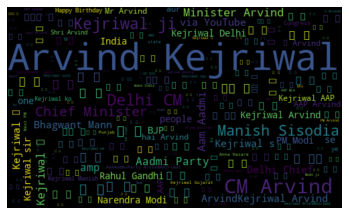

In [35]:
consolidated=' '.join(word for word in df2 ['CleanedTweet'])
wordCloud=WordCloud(width=500,height=300,random_state=20,max_font_size=119).generate(consolidated)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='tPolarity', ylabel='tSubjectivity'>

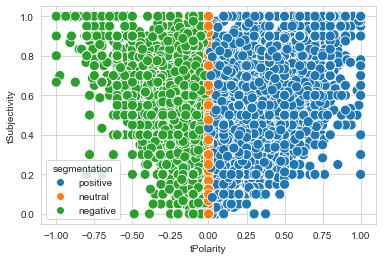

In [36]:
sns.set_style('whitegrid')
sns.scatterplot(data=df2,x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<AxesSubplot:xlabel='segmentation', ylabel='count'>

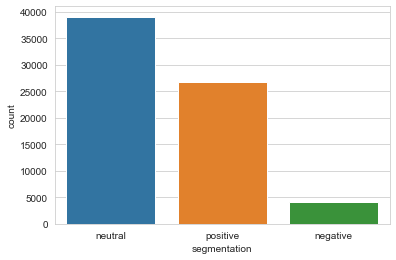

In [37]:
sns.countplot(data=df,x='segmentation')

## WE  OBSERVED THAT 'BHARAT JODO YATRA' IS GOING IN FAVOUR OF Mr. GANDHI .BUT WE CAN ALSO SEE 'MODI' IN THAT CLOUD .
## SO PEOPLE ARE ALSO MENTIONING MR. MODIJI WHILE THEY ARE COMMENTING ABOUT Mr. GANDHI .BUT IN PREVIOUS CASE IT WAS NOT HAPPENING .
## WE ARE ALSO GETTING THAT YOU TUBE ALSO HELPING Mr. GANDHI FOR REACHING PEOPLE .

# FINAL OBSERVATION:
  ## Mr.MODI IS AHEAD IN THIS RACE BUT THERE IS ALSO FEW +VE THINGS FOR Mr.GANDHI.

# SO THAT'S IT .YOU CAN ALSO DO IT FOR Mr.KEJRIWAL AND SHARE YOUR OBSERVATION WITH ME ..😃

# HOPE YOU LIKE THIS .SHARE YOUR FEEDBACK .GIVE A UPVOTE 👍 IF YOU FOUND IT USEFUL
